# Fifth Stage

In [1]:
from flash_order import *
from matplotlib.ticker import MaxNLocator

In [2]:
target_stock_code = '0050'
foc = FlashOrderCalculator(target_stock_code)

2022-11-28 16:26:56.368 | INFO     | get_data.py         :   36 | Got cache at /Users/anthonywah/Projects/mafs6100-order-placement-strategy/cache/0050.pkl - 7.87s


### 1) Flash Order Spectrum

In [3]:
foc.classify(max_dur_ms=100, trick_trade_thres_ms=100)

ClassifyingFlashOrder: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 181/181 [00:10<00:00, 17.20it/s]


Text(0.5, 1.0, 'Distribution of Flash Order Duration')

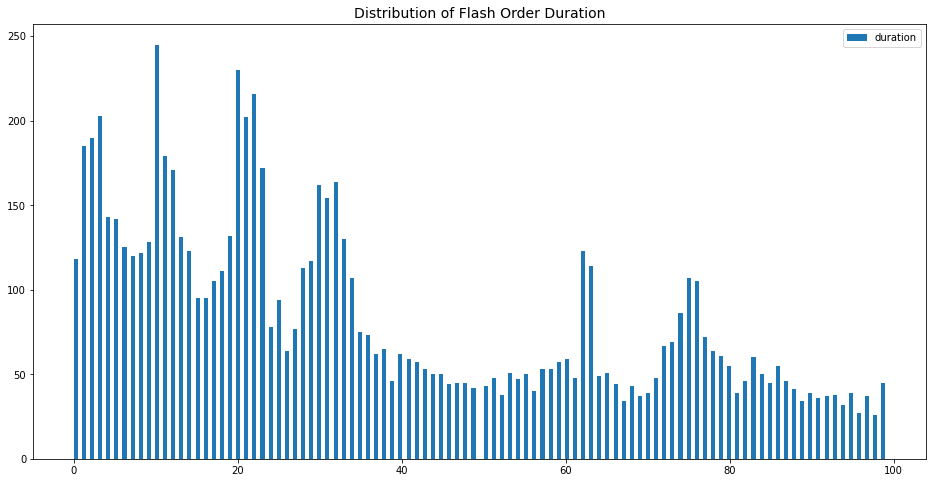

In [4]:
fig,ax = plt.subplots(figsize=(16,8))
ax.hist([i['duration'] for i in foc.fod[100]], bins=200, label='duration')
ax.legend(loc = 'upper right')
ax.set_title('Distribution of Flash Order Duration', fontsize=14)

### 2) Flash Order Size

Text(0.5, 1.0, 'Distribution of Flash Order Quantity')

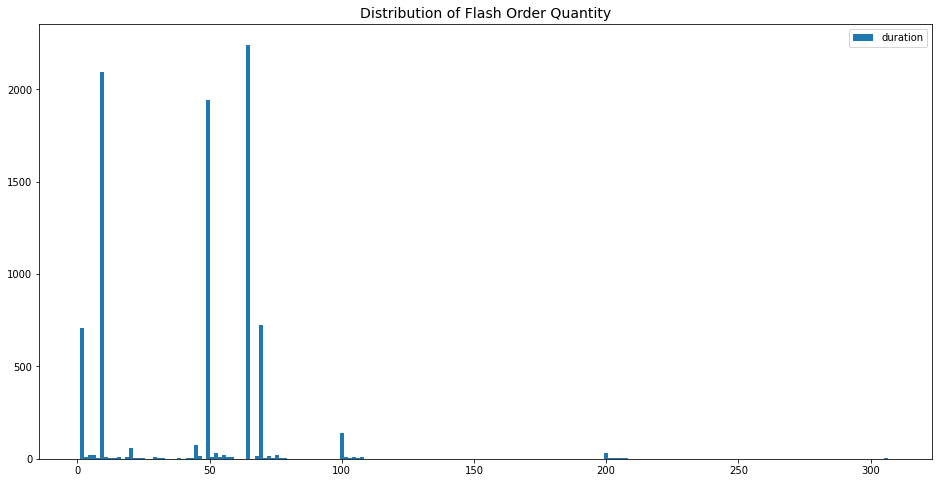

In [5]:
fig,ax = plt.subplots(figsize=(16,8))
ax.hist([i['fo_qty'] for i in foc.fod[100]], bins=200, label='duration')
ax.legend(loc = 'upper right')
ax.set_title('Distribution of Flash Order Quantity', fontsize=14)

### 3) Intra-day Pattern of Flash Orders

MatchingFlashOrderIndex: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8398/8398 [00:00<00:00, 68071.69it/s]


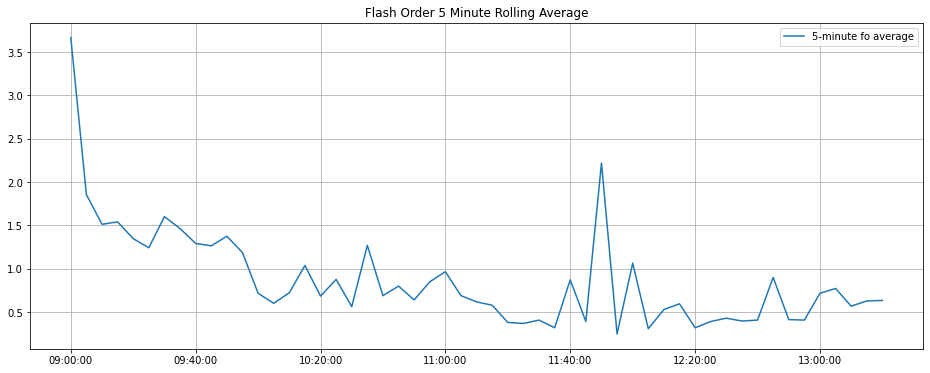

In [8]:
data_gb_cp = {k: v.assign(IS_FO=0) for k, v in foc.data_gb.items()}

for case in tqdm.tqdm(foc.fod[100], ncols=200, desc='MatchingFlashOrderIndex', total=len(foc.fod[100])):
    data_gb_cp[case['date']].at[case['start_index'], 'IS_FO'] = 1

all_df = pd.concat(list(data_gb_cp.values())).reset_index(drop=True)
all_df.loc[:, '5m_bin'] = all_df['dt'].dt.floor(freq='5min').dt.time.astype(str)
df_bin = all_df.groupby('5m_bin')[['IS_FO']].sum().reset_index()

# Start plotting
fig, ax = plt.subplots(figsize=(16, 6))
ax.set_title('Flash Order 5 Minute Rolling Average')
ax.plot(df_bin['5m_bin'], df_bin['IS_FO'] / len(data_gb_cp), label='5-minute fo average')
locator = MaxNLocator(prune='both', nbins=8)
ax.xaxis.set_major_locator(locator)
ax.grid(True)
ax.legend()
plt.show()

MatchingFlashOrderIndex: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8398/8398 [00:00<00:00, 69251.69it/s]


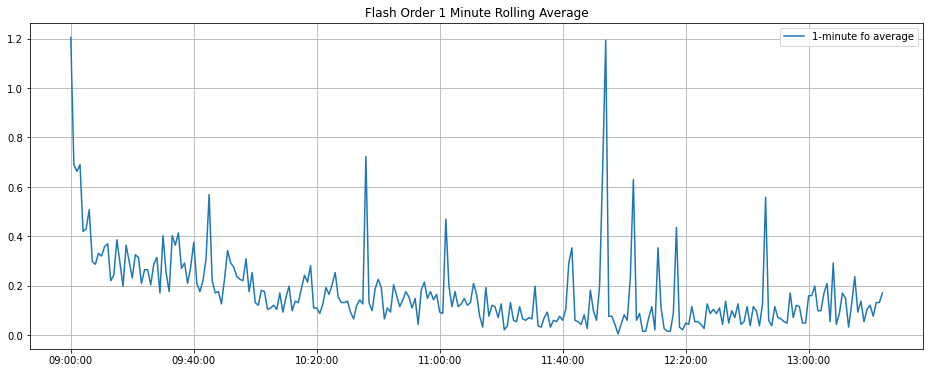

In [9]:
data_gb_cp = {k: v.assign(IS_FO=0) for k, v in foc.data_gb.items()}

for case in tqdm.tqdm(foc.fod[100], ncols=200, desc='MatchingFlashOrderIndex', total=len(foc.fod[100])):
    data_gb_cp[case['date']].at[case['start_index'], 'IS_FO'] = 1

all_df = pd.concat(list(data_gb_cp.values())).reset_index(drop=True)
all_df.loc[:, '1m_bin'] = all_df['dt'].dt.floor(freq='1min').dt.time.astype(str)
df_bin = all_df.groupby('1m_bin')[['IS_FO']].sum().reset_index()

# Start plotting
fig, ax = plt.subplots(figsize=(16, 6))
ax.set_title('Flash Order 1 Minute Rolling Average')
ax.plot(df_bin['1m_bin'], df_bin['IS_FO'] / len(data_gb_cp), label='1-minute fo average')
locator = MaxNLocator(prune='both', nbins=8)
ax.xaxis.set_major_locator(locator)
ax.grid(True)
ax.legend()
plt.show()

### 4) Success Rate of Flash Orders

In [11]:
success_rate = len([i for i in foc.fod[100] if i['tricked_trade']]) / len(foc.fod[100])
print(f'Success rate of {target_stock_code} - {100 * success_rate:.2f}%')

Success rate of 0050 - 0.85%


In [12]:
print([i['case_index'] for i in foc.fod[100] if i['tricked_trade']][:15])

[17, 162, 430, 445, 847, 849, 969, 984, 1091, 1122, 1511, 1676, 1787, 1809, 1820]


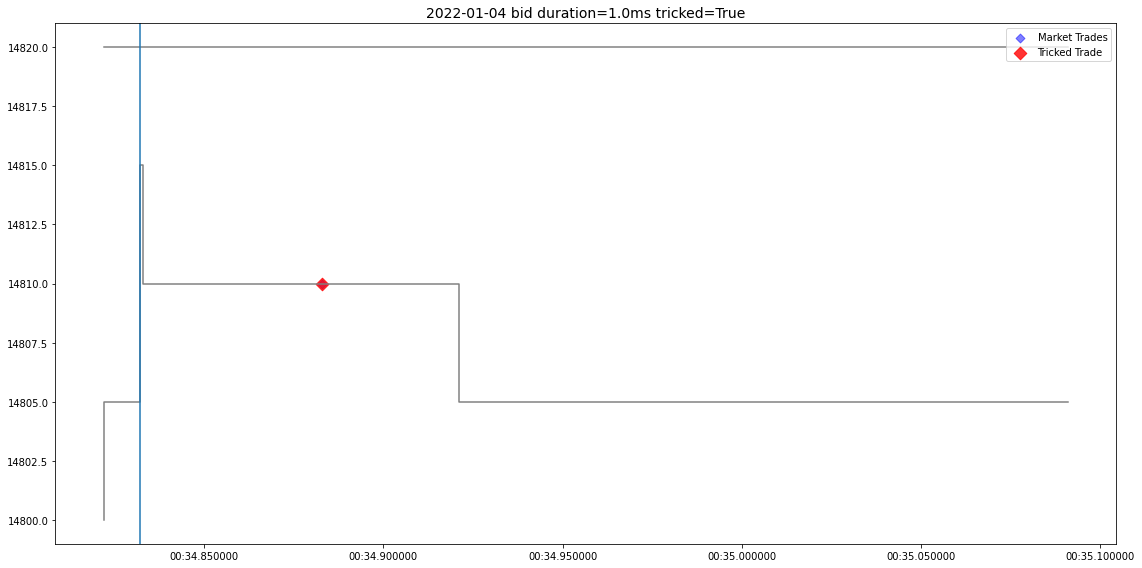

In [13]:
foc.plot_quote(100, 17)

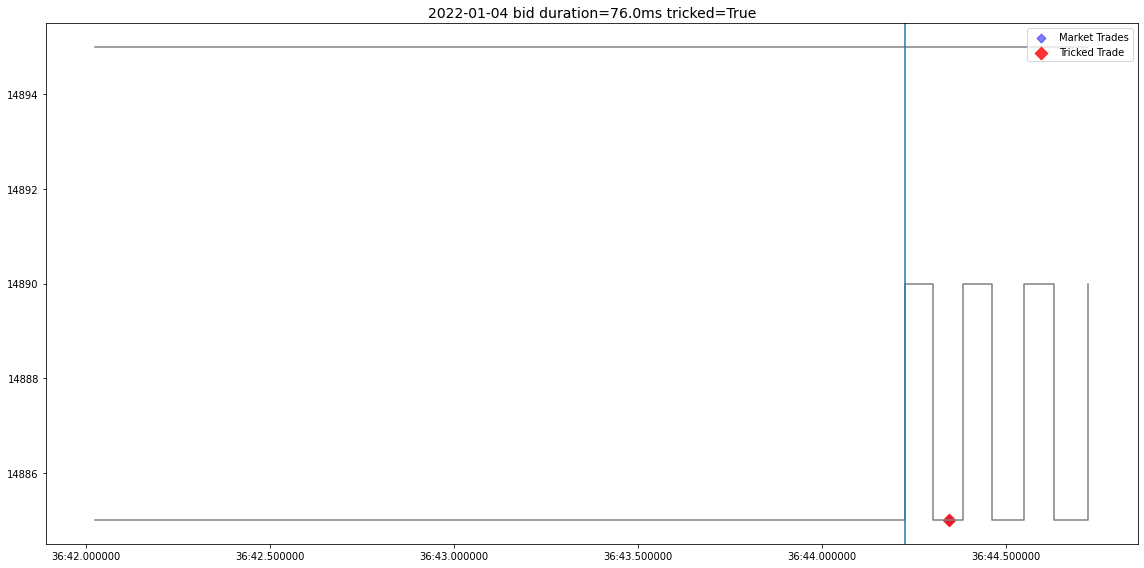

In [14]:
foc.plot_quote(100, 162)

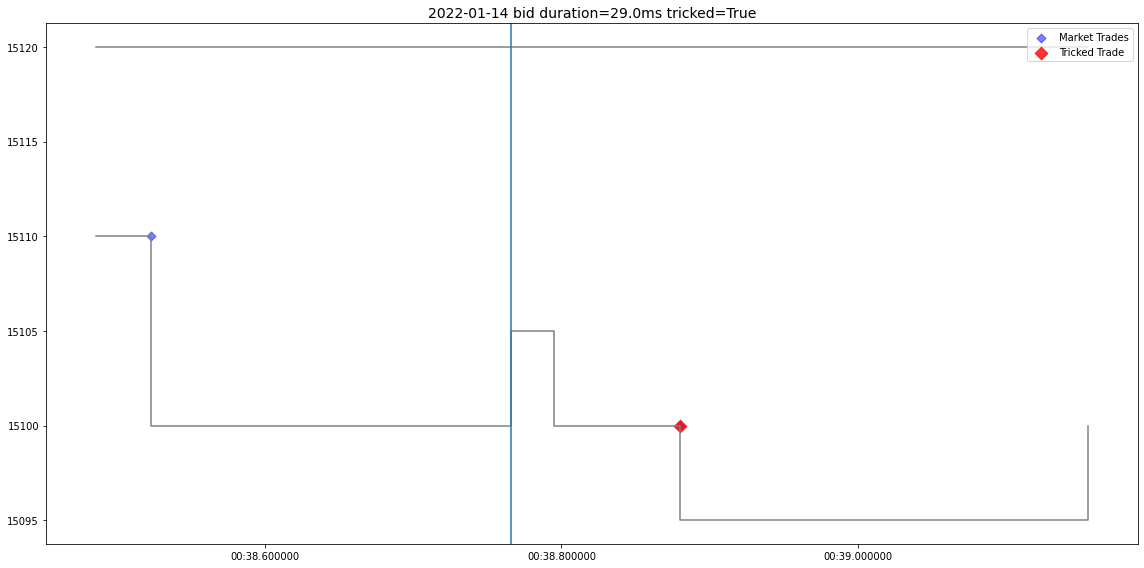

In [15]:
foc.plot_quote(100, 430)

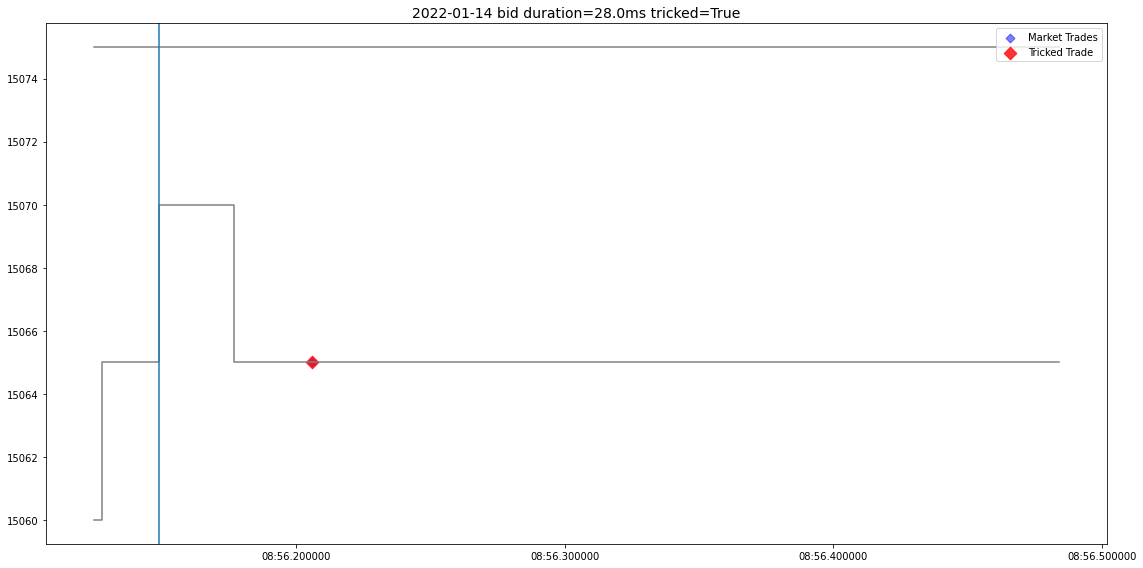

In [16]:
foc.plot_quote(100, 445)

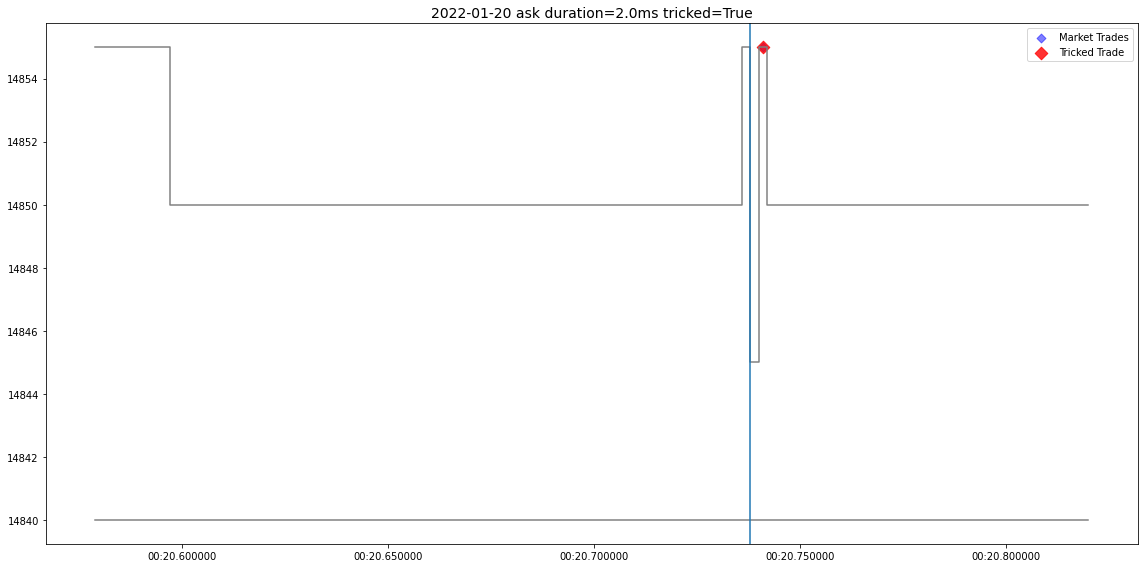

In [17]:
foc.plot_quote(100, 969)

---